<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title :  Webscrapping and Data Visualization

#### Name: Chong Mun Chen

#### IC Number: 960327-07-5097

#### Date : 7/7/2023

#### Introduction : Practising more on Webscraping, and data visualization with Matplotlib library, Seaborn package and TextTable module.



#### Conclusion : I know a little more about using Seaborn and TextTable in visualizing the data in addition to using Matplotlib graphs.






## Mini Project 2 

## Webscraping and Data Visualization

Dataset: https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/

In this project, you are encouraged to use Worldometers to extract the number of COVID cases and then you will do data analysis and create some visualizations.

1)  Import required libraries and write code to do webscraping


In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver

2) After running above code you are able to extract the data from the website, now we will be creating a pandas data frame for further analysis.



<img src="https://i.imgur.com/OgcCBss.png">

In [2]:
import pandas as pd

# driver = webdriver.Chrome('C:\\Users\ACER\Desktop\ChromeDriver\chromedriver')
driver = webdriver.Chrome()
url = "https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/"
driver.get(url)
data = []
soup = BeautifulSoup(driver.page_source,'html.parser')        
for tbody in soup.find_all('tbody'):
    for tr in tbody.find_all('tr'):
        for td in tr.find_all('td'):
            data.append(td.text.rstrip())
            
driver.quit()
        
split_data = [data[i:i+4] for i in range(0, len(data), 4)]
df = pd.DataFrame(split_data, columns = ['Country', 'Number of Cases', 'Deaths', 'Continent'])
df

,Country,Number of Cases,Deaths,Continent
0,United States,"107,518,785","1,169,841",North America
1,India,"44,995,665","531,917",Asia
2,France,"40,138,560","167,642",Europe
3,Germany,"38,428,685","174,352",Europe
4,Brazil,"37,728,415","704,794",South America
...,...,...,...,...
225,Niue,822,0,Australia/Oceania
226,Tokelau,80,0,Australia/Oceania
227,Holy See,29,0,Europe
228,Western Sahara,10,1,Africa


3) Data Type

<img src="https://i.imgur.com/YccV35I.png">

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          230 non-null    object
 1   Number of Cases  230 non-null    object
 2   Deaths           230 non-null    object
 3   Continent        230 non-null    object
dtypes: object(4)
memory usage: 7.3+ KB


4) Creating a new column Death_rate

Hint: Death_rate = 100*(Death/Number of cases) 

In [4]:
df['Deaths'] = df['Deaths'].str.replace(',', '')
df['Number of Cases'] = df['Number of Cases'].str.replace(',', '')

df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Number of Cases'] = pd.to_numeric(df['Number of Cases'])

df['Death Rate'] = 100 * df['Deaths'] / df['Number of Cases']

new_df = df[df.Continent != '']
# or new_df = df[df['Continent'] != '']

new_df

,Country,Number of Cases,Deaths,Continent,Death Rate
0,United States,107518785,1169841,North America,1.088034
1,India,44995665,531917,Asia,1.182152
2,France,40138560,167642,Europe,0.417658
3,Germany,38428685,174352,Europe,0.453703
4,Brazil,37728415,704794,South America,1.868072
...,...,...,...,...,...
224,Montserrat,1403,8,North America,0.570207
225,Niue,822,0,Australia/Oceania,0.000000
226,Tokelau,80,0,Australia/Oceania,0.000000
227,Holy See,29,0,Europe,0.000000


5) Data Visualization - Pairplot

<img src="https://i.imgur.com/ChYp5AF.png">

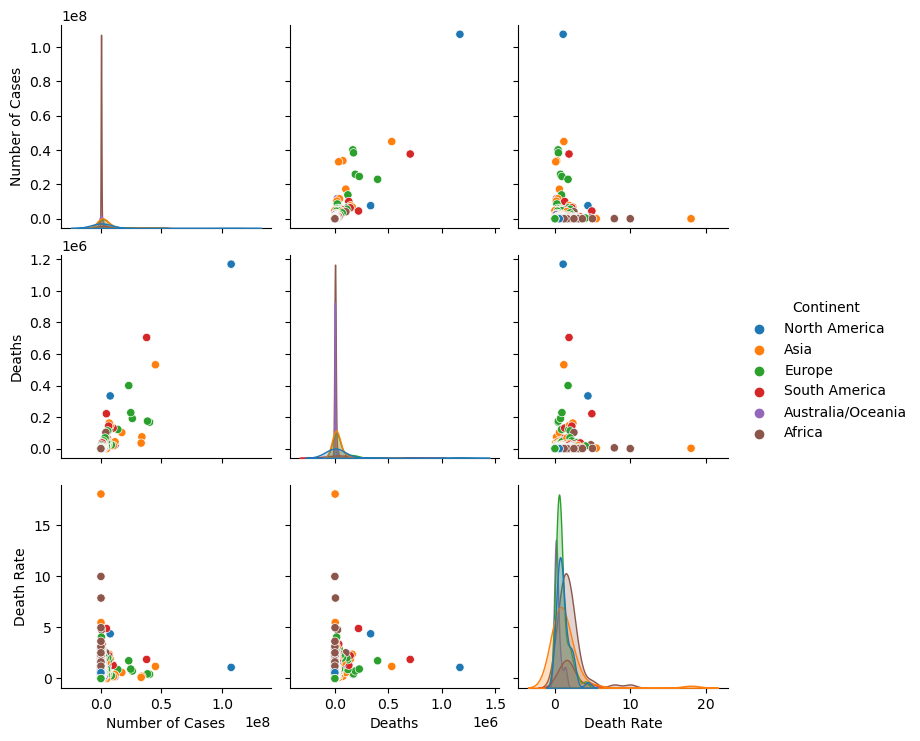

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(new_df, hue = 'Continent')

6) Data Visualization - barplot

<img src="https://i.imgur.com/BipzQ1w.png">

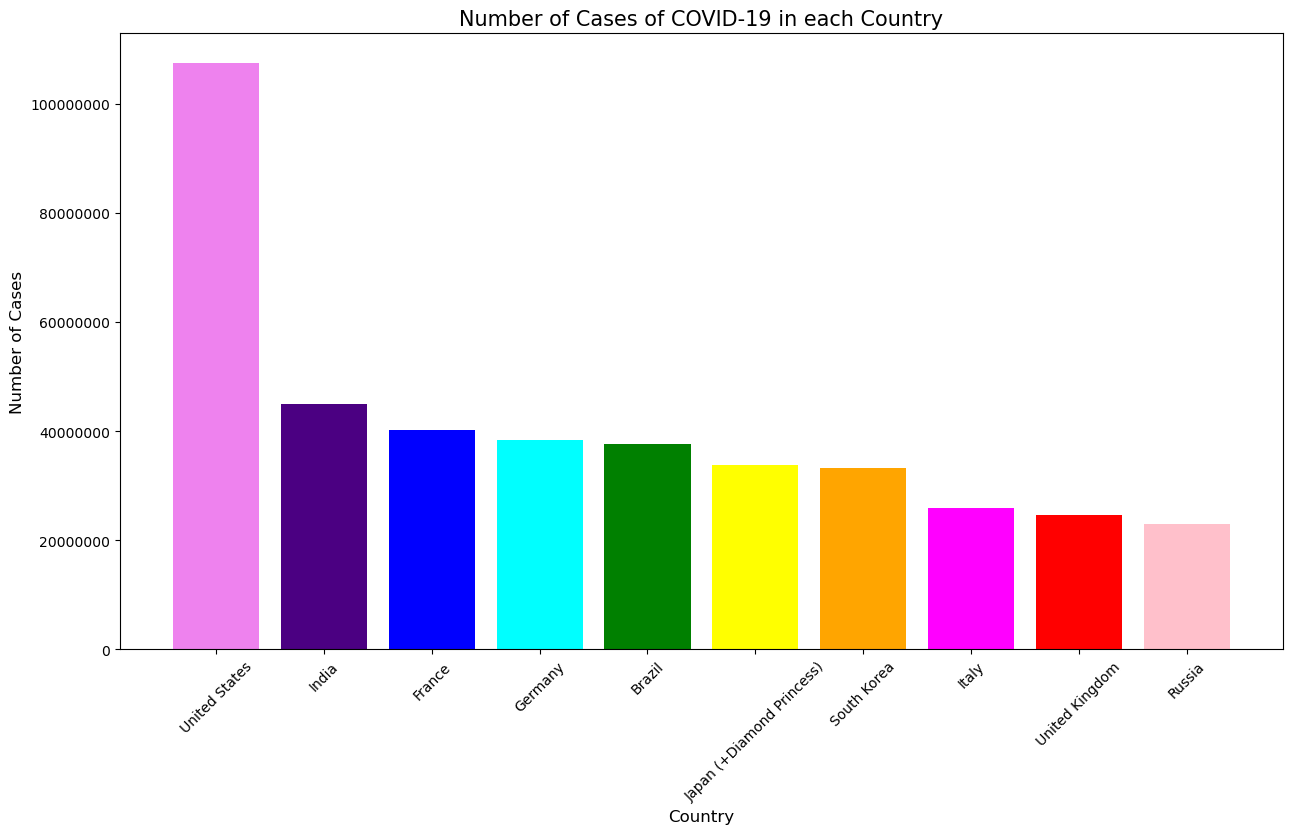

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.bar(new_df['Country'].head(10), new_df['Number of Cases'].head(10),
 color = ['violet', 'indigo', 'blue', 'cyan', 'green', 'yellow', 
          'orange', 'magenta', 'red', 'pink'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('Number of Cases of COVID-19 in each Country', fontsize = 15)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Number of Cases', fontsize = 12)
plt.xticks(rotation=45)

plt.show()
plt.tight_layout()

7) Data Visualization - regplot

<img src="https://i.imgur.com/zMbQnVU.png">

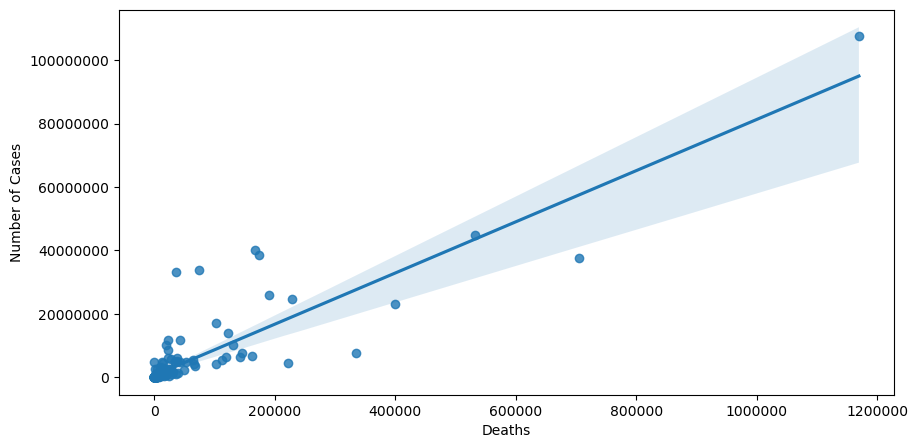

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
sns.regplot(x = new_df['Deaths'], y = new_df['Number of Cases'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'x')
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.show()

8) Data Visualization - scatterplot

<img src="https://i.imgur.com/DXrhNSN.png">

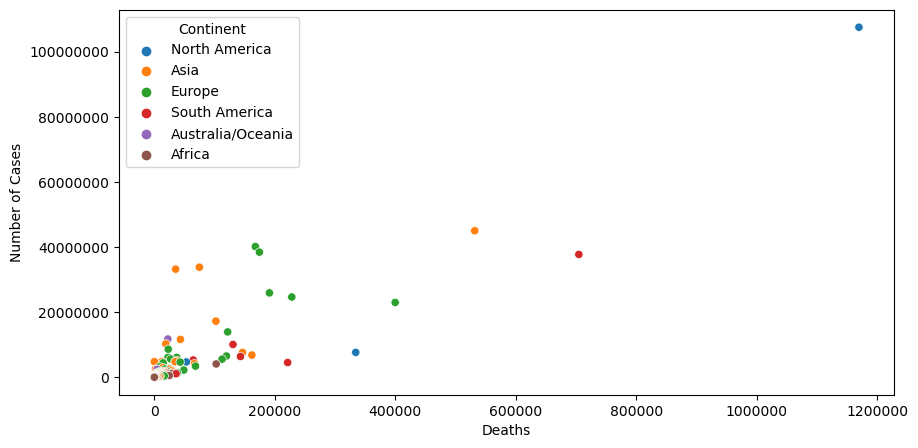

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
sns.scatterplot(x = new_df['Deaths'], y = new_df['Number of Cases'], hue = new_df['Continent'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'x')
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.show()

9) Data Visualization - boxplot

<img src="https://i.imgur.com/jdnbzuf.png">

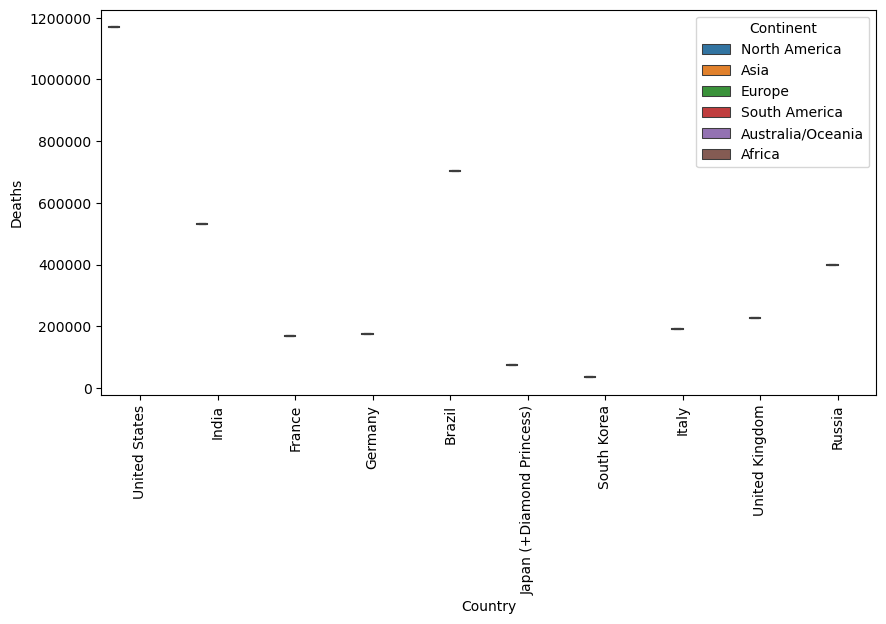

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
sns.boxplot(x = new_df['Country'].head(10), y = new_df['Deaths'].head(10), hue = new_df['Continent'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.xticks(rotation=90)
plt.show()

10) Write code to show the table as below

<img src="https://i.imgur.com/3mSmbKJ.png">

In [10]:
continent_df = new_df.groupby(['Continent'])[['Number of Cases', 'Deaths', 'Death Rate']].sum().reset_index()
continent_df = continent_df.sort_values('Death Rate', ascending=False)
continent_df

,Continent,Number of Cases,Deaths,Death Rate
0,Africa,12836207,258822,110.726874
1,Asia,219274682,1548328,68.609617
3,Europe,249726917,2068333,43.911809
4,North America,127221739,1639397,42.009757
5,South America,68903187,1359041,24.910615
2,Australia/Oceania,14586751,29807,6.585159


11) Data Visualization - barplot with death rate

<img src="https://i.imgur.com/lxA1NiM.png">

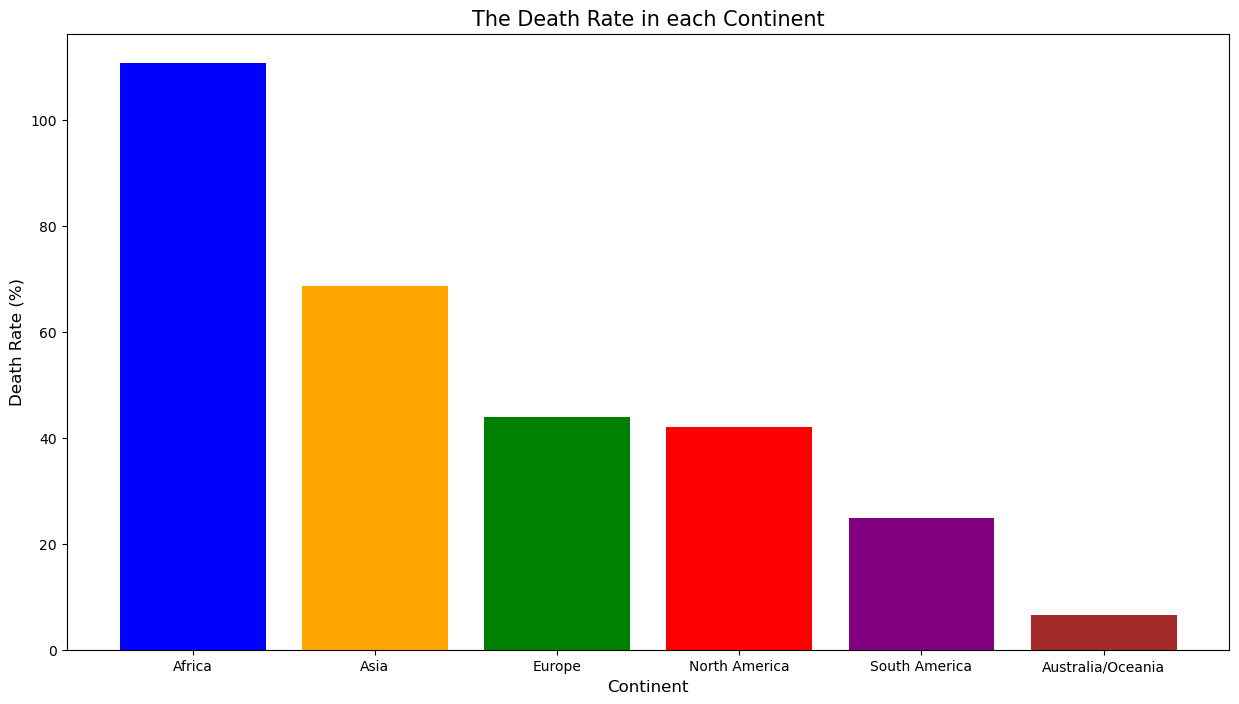

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.bar(continent_df['Continent'], continent_df['Death Rate'],
 color = ['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('The Death Rate in each Continent', fontsize = 15)
plt.xlabel('Continent', fontsize = 12)
plt.ylabel('Death Rate (%)', fontsize = 12)

plt.show()
plt.tight_layout()

12) Create texttable 

Hint: 
import texttable as tt

table = tt.Texttable() 
table.add_rows([(None, None, None, None)] + data)  # Add an empty row at the beginning for the headers 

<img src="https://i.imgur.com/r4LZ1aW.png">

In [14]:
import texttable as tt

data = df.head(8)
table = tt.Texttable()
country = data['Country']
cases = data['Number of Cases']
deaths = data['Deaths']
continent = data['Continent']
rows = [['Country', 'Number of Cases', 'Deaths', 'Continent']]

for i in range(8):
    rows.append([country[i], cases[i], deaths[i], continent[i]])
    
table.add_rows(rows)
print(table.draw())

+---------------------------+-----------------+---------+---------------+
|          Country          | Number of Cases | Deaths  |   Continent   |
+===========================+=================+=========+===============+
| United States             | 1.075e+08       | 1169841 | North America |
+---------------------------+-----------------+---------+---------------+
| India                     | 44995665        | 531917  | Asia          |
+---------------------------+-----------------+---------+---------------+
| France                    | 40138560        | 167642  | Europe        |
+---------------------------+-----------------+---------+---------------+
| Germany                   | 38428685        | 174352  | Europe        |
+---------------------------+-----------------+---------+---------------+
| Brazil                    | 37728415        | 704794  | South America |
+---------------------------+-----------------+---------+---------------+
| Japan (+Diamond Princess) | 33804284